In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [17]:
import os

In [3]:
bs = 16

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.CIFAR); path

WindowsPath('C:/Users/User/.fastai/data/cifar10')

In [6]:
path.ls()

[WindowsPath('C:/Users/User/.fastai/data/cifar10/labels.txt'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/test'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train')]

In [15]:
path_lab = path/'labels.txt'
path_fold_train = path/'train'
path_fold_test = path/'test'

In [18]:
paths_train = os.listdir( path_fold_train )

In [19]:
paths_train

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [22]:
paths_fold_train = [path_fold_train/p for p in paths_train]
paths_fold_test = [path_fold_test/p for p in paths_train]

In [23]:
paths_fold_train

[WindowsPath('C:/Users/User/.fastai/data/cifar10/train/airplane'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/automobile'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/bird'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/cat'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/deer'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/dog'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/frog'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/horse'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/ship'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/truck')]

In [29]:
fnames = []
for p in paths_fold_train:
    fnames = fnames + get_image_files(p)
fnames[:5]

[WindowsPath('C:/Users/User/.fastai/data/cifar10/train/airplane/10008_airplane.png'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/airplane/10010_airplane.png'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/airplane/10020_airplane.png'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/airplane/10024_airplane.png'),
 WindowsPath('C:/Users/User/.fastai/data/cifar10/train/airplane/10031_airplane.png')]

In [30]:
len(fnames)

50000

In [33]:
data = ImageDataBunch.from_folder(path,train='train', valid='test')

In [34]:
data

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\User\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\User\.fastai\data\cifar10;

Test: None

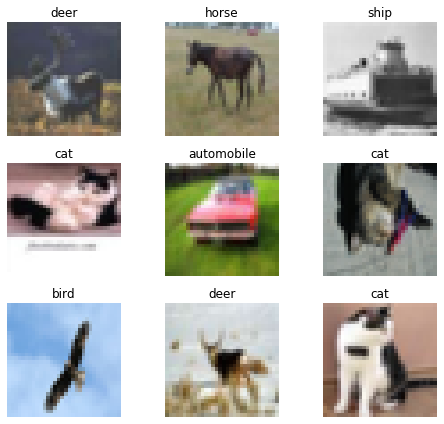

In [35]:
data.show_batch(rows=3, figsize=(7,6))

In [36]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

In [37]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [38]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [39]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 16, 16]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 16, 16]         128        True      
______________________________________________________________________
ReLU                 [64, 16, 16]         0          False     
______________________________________________________________________
MaxPool2d            [64, 8, 8]           0          False     
______________________________________________________________________
Conv2d               [64, 8, 8]           36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 8, 8]           128        True      
______________________________________________________________________
ReLU                 [64, 8, 8]           0          False     
___________________________________________________

In [40]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.643630,1.512193,0.520000,06:26
1,1.255031,1.133439,0.400700,04:30
2,1.068487,0.998709,0.356000,04:24
3,1.026135,0.969259,0.342800,04:24


In [41]:
learn.save('CIFAR10')

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

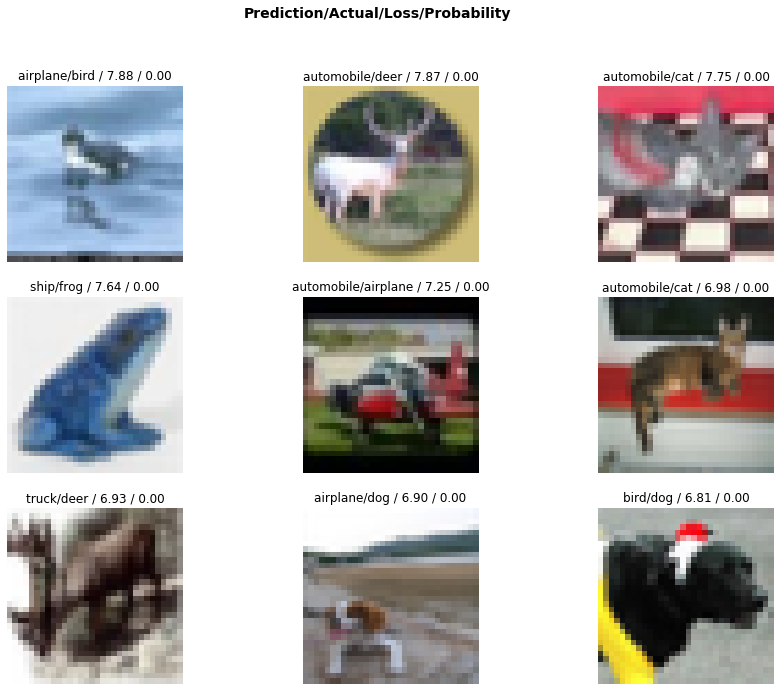

In [43]:
interp.plot_top_losses(9, figsize=(15,11))

In [44]:
doc(interp.plot_top_losses)

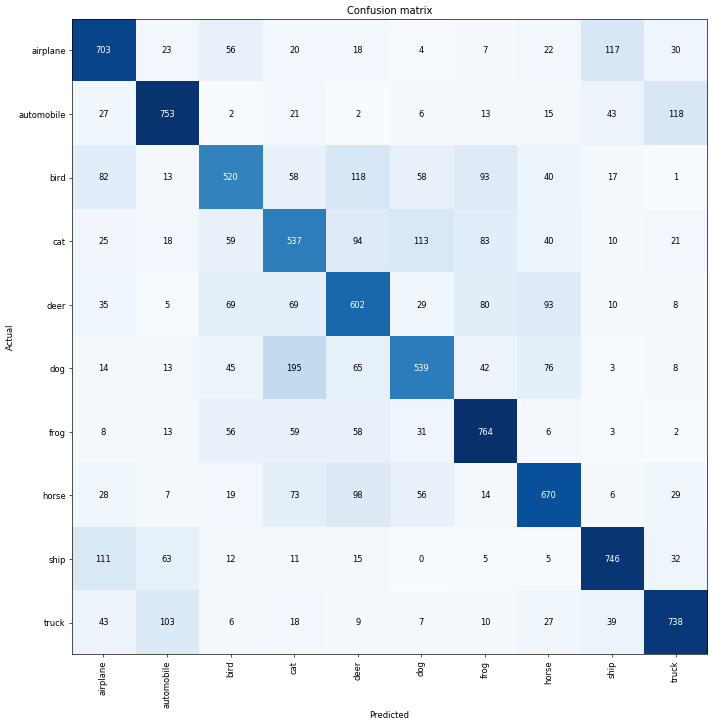

In [45]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [48]:
interp.most_confused(min_val=50)

[('dog', 'cat', 195),
 ('automobile', 'truck', 118),
 ('bird', 'deer', 118),
 ('airplane', 'ship', 117),
 ('cat', 'dog', 113),
 ('ship', 'airplane', 111),
 ('truck', 'automobile', 103),
 ('horse', 'deer', 98),
 ('cat', 'deer', 94),
 ('bird', 'frog', 93),
 ('deer', 'horse', 93),
 ('cat', 'frog', 83),
 ('bird', 'airplane', 82),
 ('deer', 'frog', 80),
 ('dog', 'horse', 76),
 ('horse', 'cat', 73),
 ('deer', 'bird', 69),
 ('deer', 'cat', 69),
 ('dog', 'deer', 65),
 ('ship', 'automobile', 63),
 ('cat', 'bird', 59),
 ('frog', 'cat', 59),
 ('bird', 'cat', 58),
 ('bird', 'dog', 58),
 ('frog', 'deer', 58),
 ('airplane', 'bird', 56),
 ('frog', 'bird', 56),
 ('horse', 'dog', 56)]

In [49]:
learn.unfreeze()

In [50]:
learn.load('CIFAR10');

In [51]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


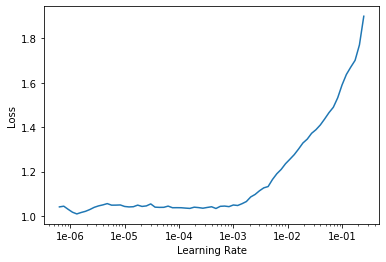

In [53]:
learn.recorder.plot()

In [54]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.873405,0.791837,0.276000,04:48
1,0.720685,0.732664,0.254900,04:59


In [55]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

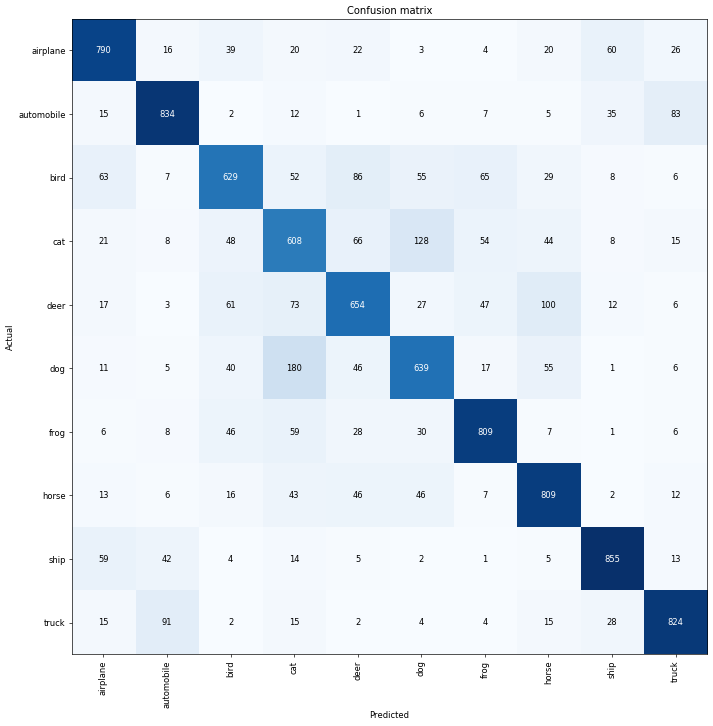

In [56]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [57]:
interp.most_confused(min_val=50)

[('dog', 'cat', 180),
 ('cat', 'dog', 128),
 ('deer', 'horse', 100),
 ('truck', 'automobile', 91),
 ('bird', 'deer', 86),
 ('automobile', 'truck', 83),
 ('deer', 'cat', 73),
 ('cat', 'deer', 66),
 ('bird', 'frog', 65),
 ('bird', 'airplane', 63),
 ('deer', 'bird', 61),
 ('airplane', 'ship', 60),
 ('frog', 'cat', 59),
 ('ship', 'airplane', 59),
 ('bird', 'dog', 55),
 ('dog', 'horse', 55),
 ('cat', 'frog', 54),
 ('bird', 'cat', 52)]

In [61]:
learn.save("CIFAR10")

In [62]:
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev) 
a = torch.zeros(4,3) 
a = a.to(device)
learn.load('CIFAR10', device = device)

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\User\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\User\.fastai\data\cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batc

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.664851,0.706690,0.244200,05:28
